**TEST DATA VISUALISATION**

In [3]:
from pathlib import Path
import pandas as pd
test_df = pd.read_csv('/content/data/test.csv')
weather_test_df = pd.read_csv('/content/data/weather_test.csv')
building_meta_df = pd.read_csv('/content/data/building_metadata.csv')

In [5]:
#Removing timestamp from date
weather_test_df['timestamp'] = pd.to_datetime(weather_test_df['timestamp'])
weather_test_df['date'] = weather_test_df['timestamp'].dt.date

In [6]:
#Removing duplicates
weather_test_df1=weather_test_df.drop_duplicates(subset='date',keep="last")

In [7]:
#Removing timestamp from date
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
test_df['date'] = test_df['timestamp'].dt.date

In [8]:
#Removing duplicates
test_df1=test_df.drop_duplicates(subset='date',keep="last")

In [9]:
#Merging datasets
test_merge = test_df1.merge(building_meta_df, on='building_id', how='inner')
test_merge = test_merge.merge(weather_test_df1, on=['site_id'], how='inner')

In [10]:
test_merge.shape

(421940, 19)

**CORRELATION**

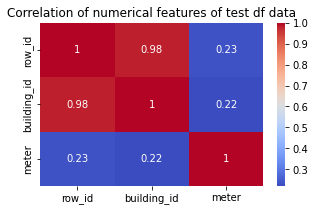

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
corr_test=test_df.corr().round(2)

fig, ax = plt.subplots(figsize=(5,3))  
sns.heatmap(corr_test,annot=True,ax=ax,cmap='coolwarm')
ax.set_title('Correlation of numerical features of test df data')
plt.show()

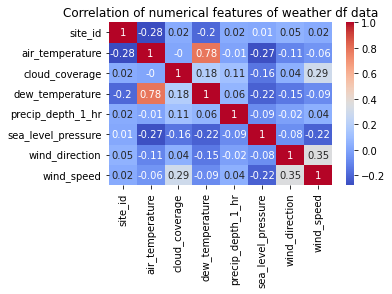

In [14]:
corr_weather=weather_test_df.corr().round(2)

fig, ax = plt.subplots(figsize=(5,3))  
sns.heatmap(corr_weather,annot=True,ax=ax,cmap='coolwarm')
ax.set_title('Correlation of numerical features of weather df data')
plt.show()

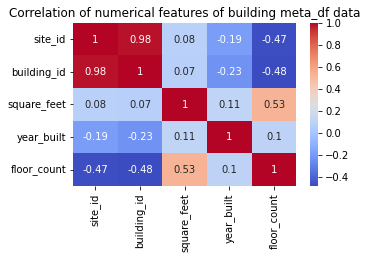

In [15]:
corr_building=building_meta_df.corr().round(2)
fig, ax = plt.subplots(figsize=(5,3))  
sns.heatmap(corr_building,annot=True,ax=ax,cmap='coolwarm')
ax.set_title('Correlation of numerical features of building meta_df data')
plt.show()

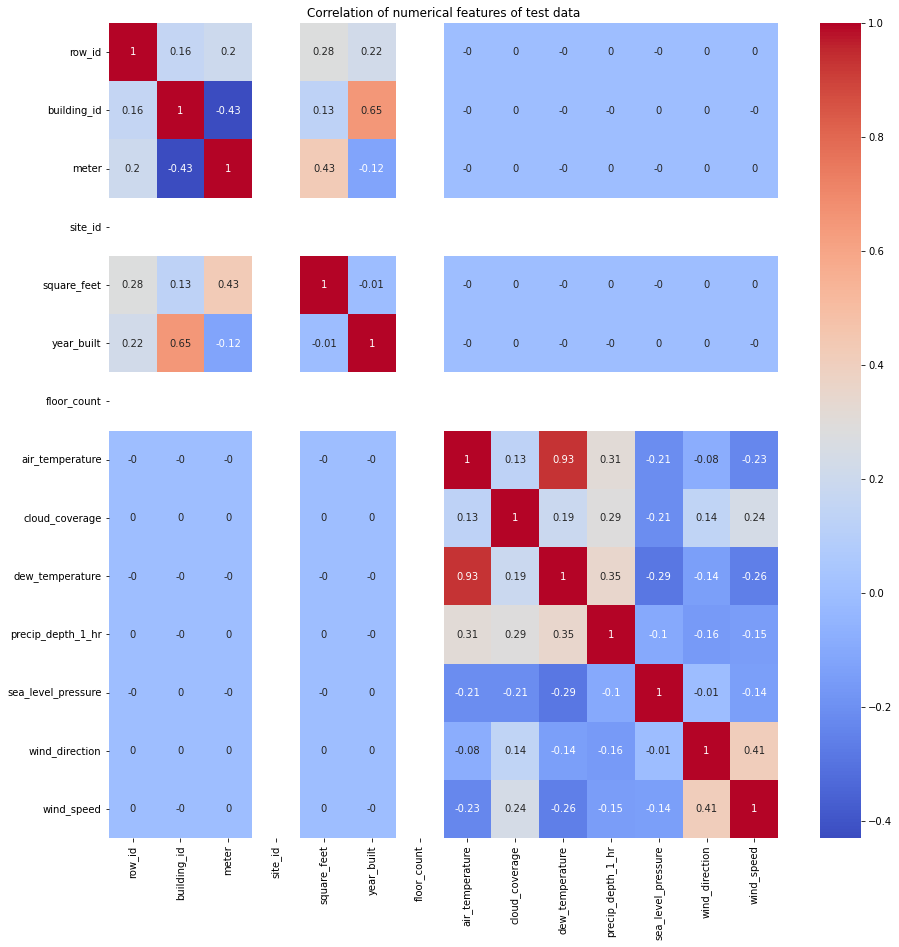

In [16]:
correlation=test_merge.corr().round(2)

fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(correlation,annot=True,cmap='coolwarm')
ax.set_title('Correlation of numerical features of test data')
plt.show()

In [17]:
null_weather = weather_test_df.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_weather)

                    NaN count
site_id                     0
timestamp                   0
air_temperature           104
cloud_coverage         140448
dew_temperature           327
precip_depth_1_hr       95588
sea_level_pressure      21265
wind_direction          12370
wind_speed                460
date                        0


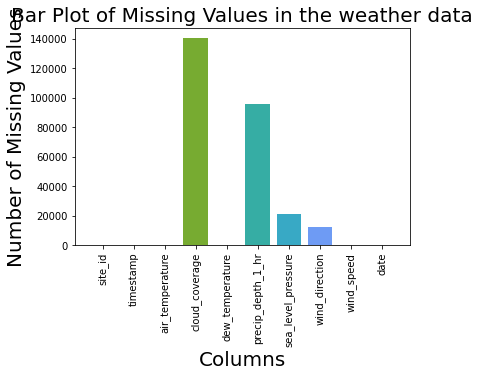

In [18]:
my_palette = sns.color_palette('husl', len(null_weather))
plt.bar(null_weather.index, null_weather['NaN count'], color=my_palette)
plt.xticks(rotation=90)
plt.xlabel('Columns',fontdict={'fontsize': 20})
plt.ylabel('Number of Missing Values',fontdict={'fontsize': 20})
plt.title('Bar Plot of Missing Values in the weather data',fontdict={'fontsize': 20})
plt.show()

In [19]:
null_building = building_meta_df.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_building)

             NaN count
site_id              0
building_id          0
primary_use          0
square_feet          0
year_built         774
floor_count       1094


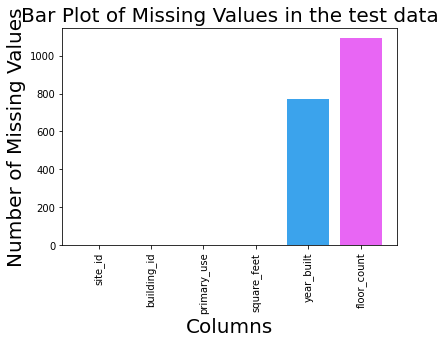

In [24]:
my_palette = sns.color_palette('husl', len(null_building))
plt.bar(null_building.index, null_building['NaN count'], color=my_palette)
plt.xticks(rotation=90)
plt.xlabel('Columns',fontdict={'fontsize': 20})
plt.ylabel('Number of Missing Values',fontdict={'fontsize': 20})
plt.title('Bar Plot of Missing Values in the test data',fontdict={'fontsize': 20})
plt.show()

In [21]:
null_test_merge = test_merge.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_test_merge)

                    NaN count
row_id                      0
building_id                 0
meter                       0
timestamp_x                 0
date_x                      0
site_id                     0
primary_use                 0
square_feet                 0
year_built               6570
floor_count            421940
timestamp_y                 0
air_temperature          1156
cloud_coverage         213282
dew_temperature          1156
precip_depth_1_hr      327148
sea_level_pressure      35258
wind_direction           4624
wind_speed                  0
date_y                      0


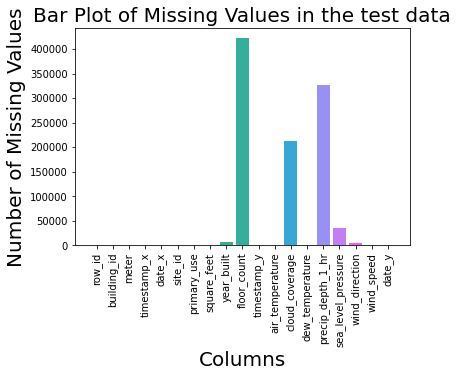

In [23]:
my_palette = sns.color_palette('husl', len(null_test_merge))
plt.bar(null_test_merge.index, null_test_merge['NaN count'], color=my_palette)
plt.xticks(rotation=90)
plt.xlabel('Columns',fontdict={'fontsize': 20})
plt.ylabel('Number of Missing Values',fontdict={'fontsize': 20})
plt.title('Bar Plot of Missing Values in the test data',fontdict={'fontsize': 20})
plt.show()

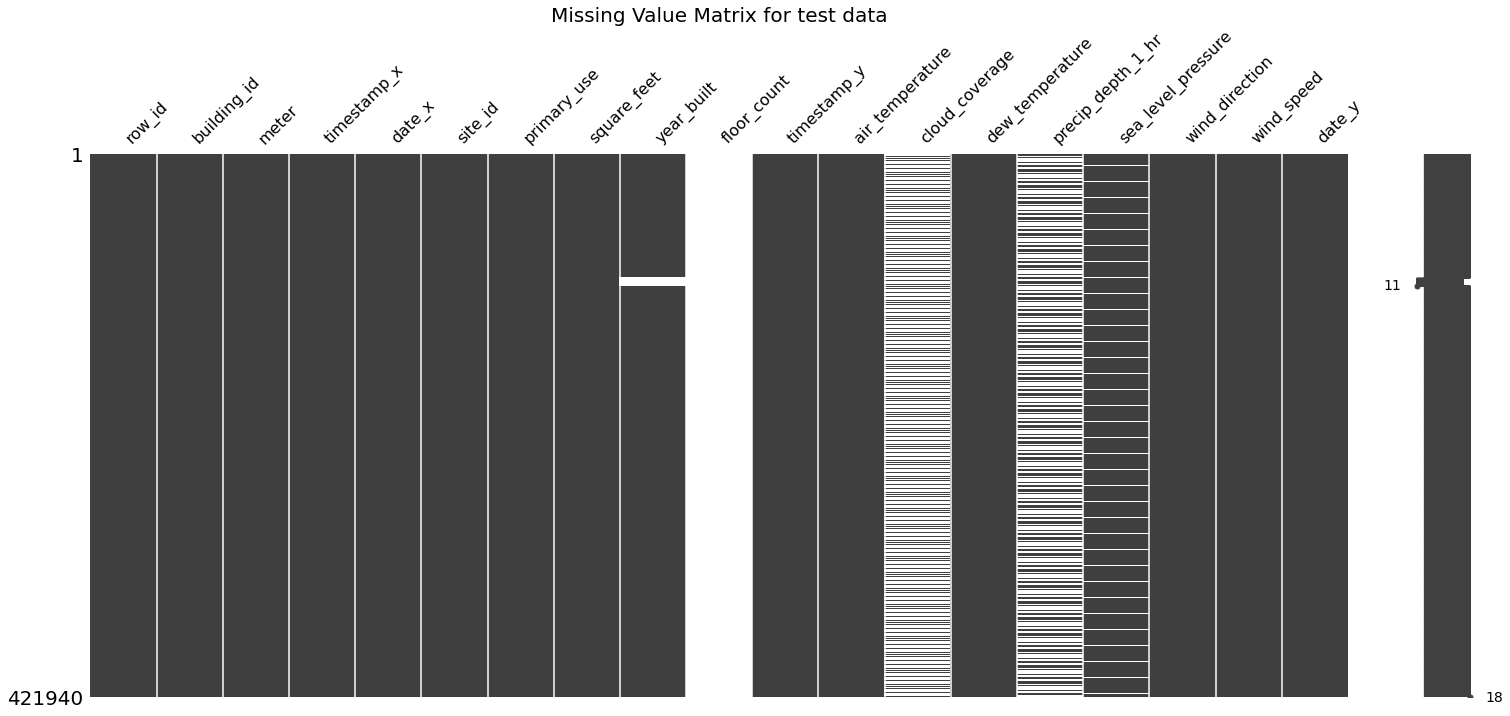

In [25]:
msno.matrix(test_merge)
plt.title("Missing Value Matrix for test data", fontdict={'fontsize': 20})
plt.show()

**OUTLIERS**

In [26]:
def boxplot_func(dFrame, fea_list):
  f, ax = plt.subplots(1, len(fea_list), figsize=(25,10))
  for i in range(len(fea_list)):
    sns.boxplot(data = dFrame[fea_list[i]], ax = ax[i])
    ax[i].set_xlabel(fea_list[i])

In [27]:
def plot_boxplot(df, column_name):
    min_val = df[column_name].min()
    max_val = df[column_name].max()
    avg_val = df[column_name].mean()
    std_val = df[column_name].std()
    # Create a list with the statistics values
    stats_values = [min_val, max_val, avg_val, std_val]
    # Create a list with the actual column values
    data_values = df[column_name].dropna()
    plt.boxplot(data_values)
    # Add horizontal lines for the statistics values
    plt.axhline(y=min_val, color='r', linestyle='-')
    plt.axhline(y=max_val, color='r', linestyle='-')
    plt.axhline(y=avg_val, color='g', linestyle='-')
    plt.axhline(y=avg_val-std_val, color='y', linestyle='--')
    plt.axhline(y=avg_val+std_val, color='y', linestyle='--')
    plt.xlabel(column_name, fontsize=20)
    plt.title(f'{column_name} in train data', fontsize=20)
    plt.ylabel('Values', fontsize=20)
    plt.show()

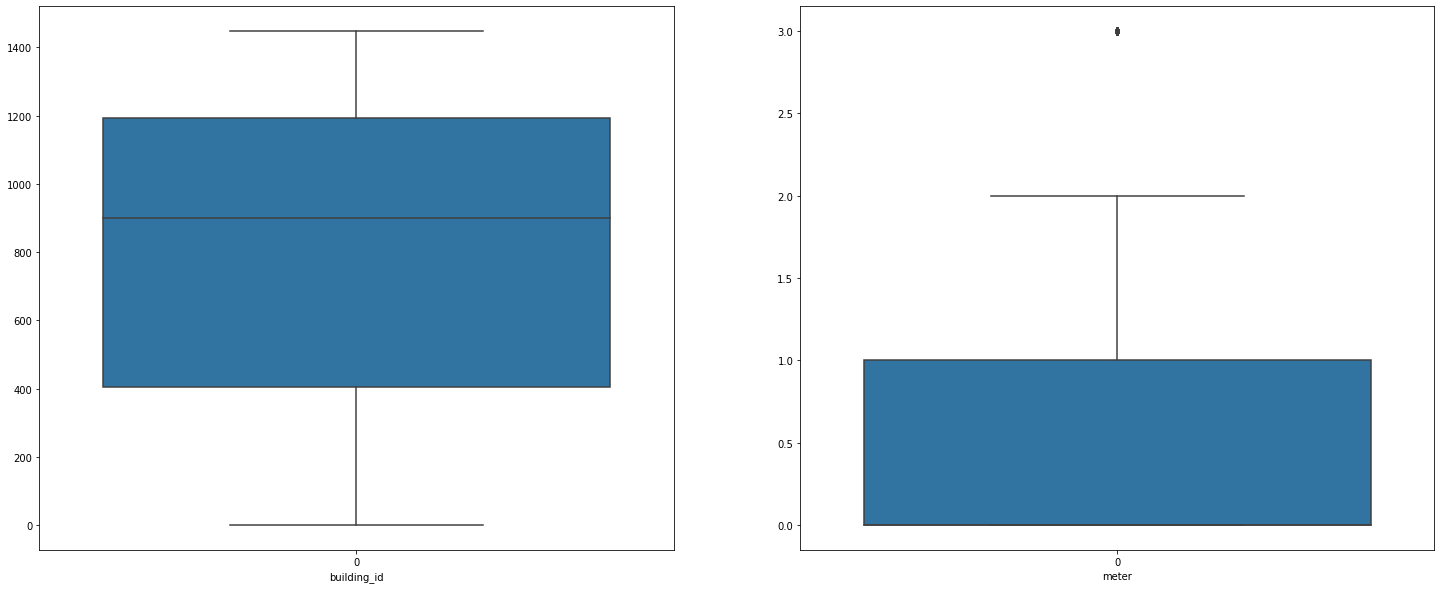

In [32]:
#outlier in test_df
boxplot_func(test_df,['building_id', 'meter'])
plt.show()

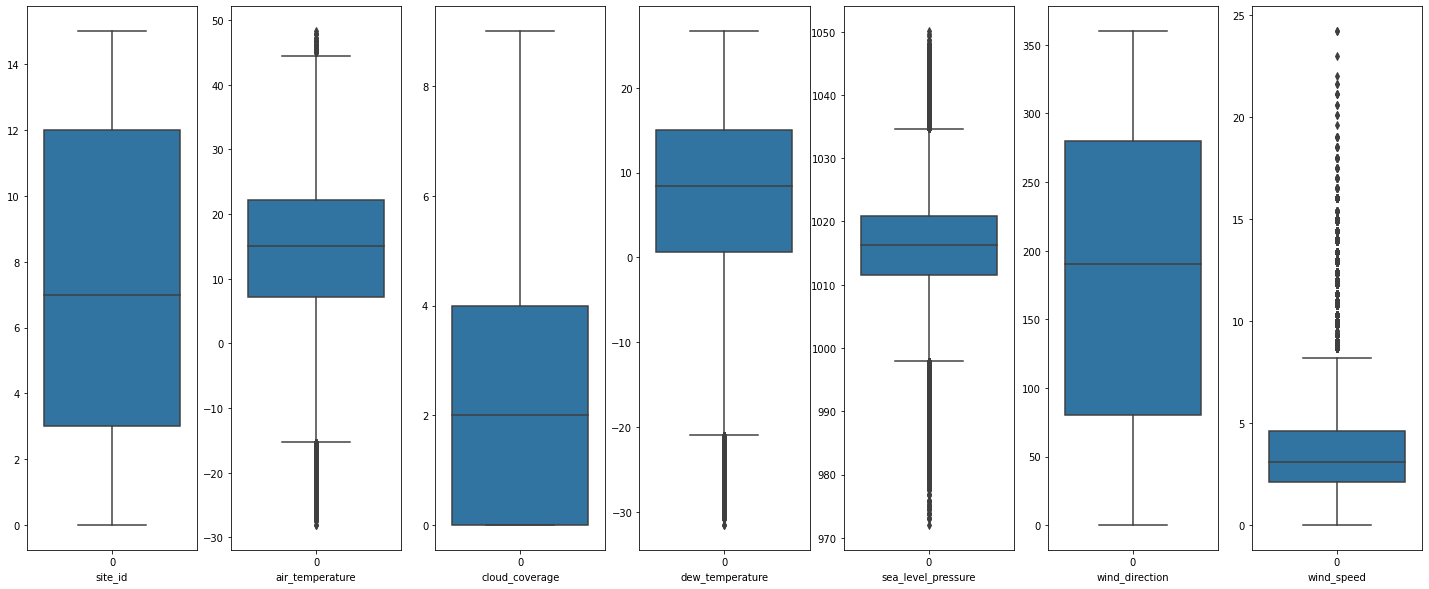

In [33]:
#outlier in weather_train_df
boxplot_func(weather_test_df,['site_id', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'sea_level_pressure',
       'wind_direction', 'wind_speed'])
plt.show()

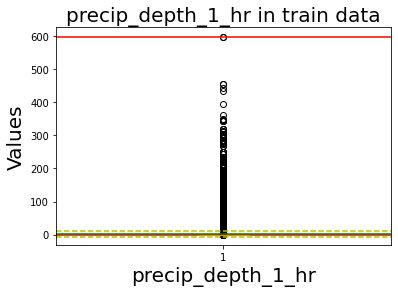

In [34]:
plot_boxplot(weather_test_df,'precip_depth_1_hr')

In [35]:
weather_test_df['precip_depth_1_hr'].describe()

count    181655.000000
mean          1.095395
std           9.163511
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         597.000000
Name: precip_depth_1_hr, dtype: float64

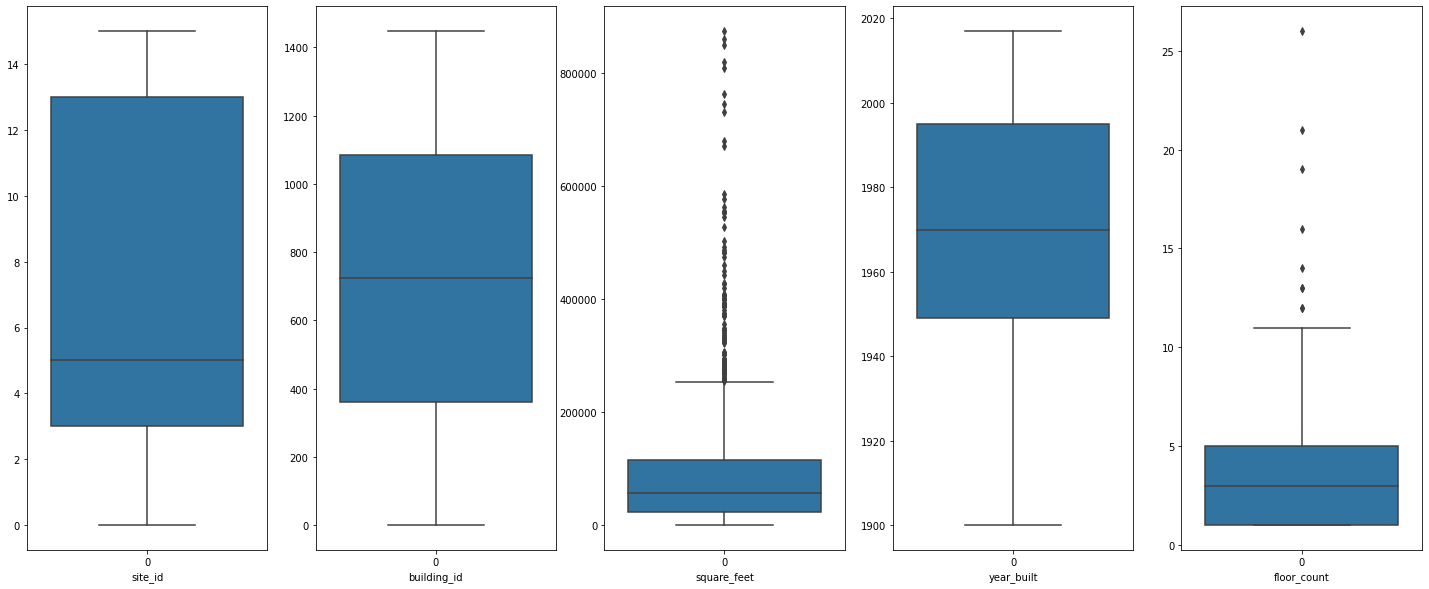

In [36]:
#outlier in building_meta_df
boxplot_func(building_meta_df,['site_id', 'building_id', 'square_feet', 'year_built',
       'floor_count'])
plt.show()

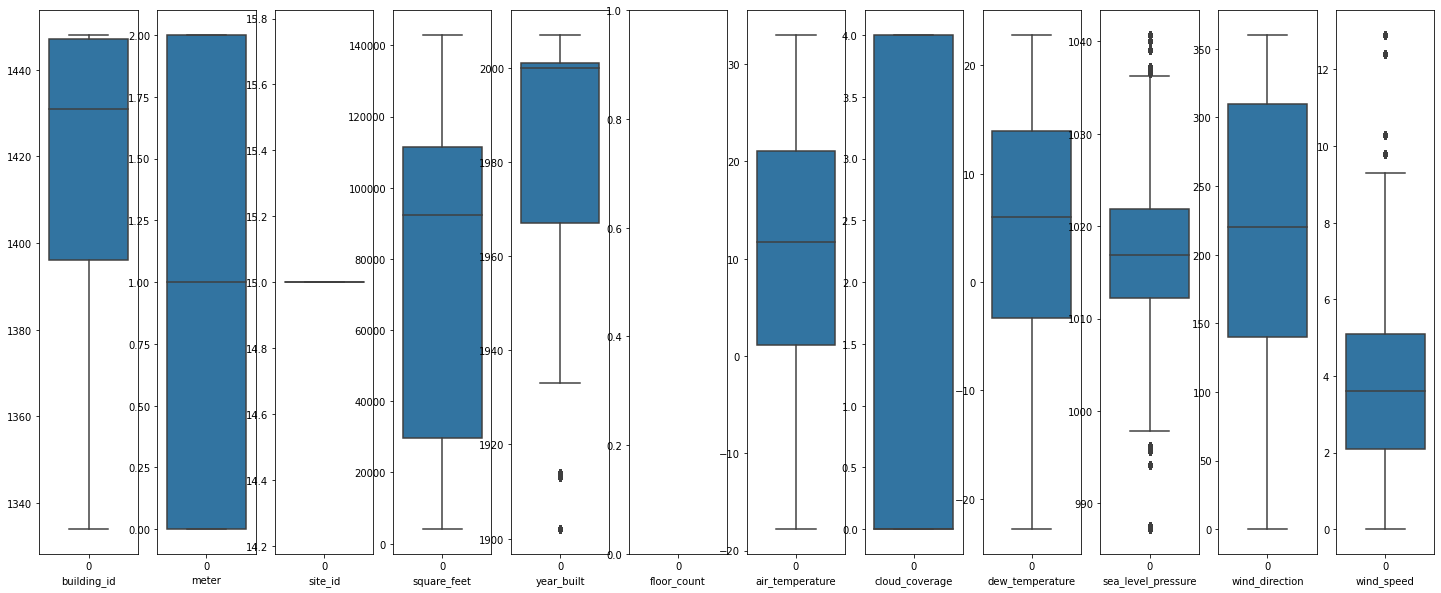

In [38]:
#outlier in train_merge
boxplot_func(test_merge,['building_id', 'meter', 'site_id',
       'square_feet', 'year_built', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'sea_level_pressure', 'wind_direction',
       'wind_speed'])
plt.show()

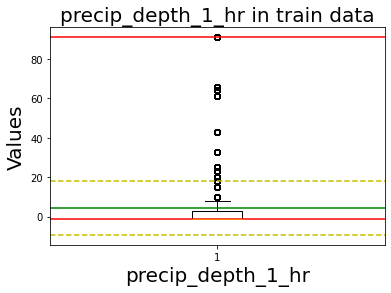

In [39]:
plot_boxplot(test_merge,'precip_depth_1_hr')

In [40]:
test_merge['precip_depth_1_hr'].describe()

count    94792.000000
mean         4.426829
std         13.709185
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          3.000000
max         91.000000
Name: precip_depth_1_hr, dtype: float64

In [43]:
def plot_histogram(df, col_name):
    log_data = np.log(df[col_name])
    sns.histplot(log_data, kde=True)
    sns.set_style('whitegrid')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.show()

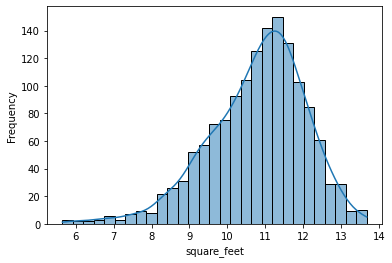

In [44]:
plot_histogram(building_meta_df, 'square_feet')

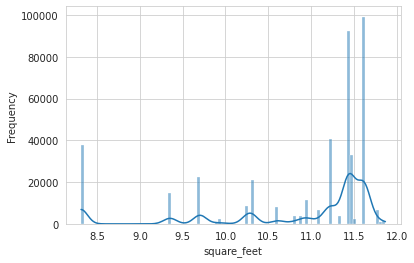

In [45]:
plot_histogram(test_merge, 'square_feet')

In [46]:
building_meta_df['square_feet'] = np.log1p(building_meta_df['square_feet'])
test_merge['square_feet'] = np.log1p(test_merge['square_feet'])

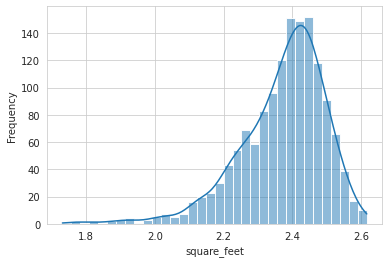

In [47]:
#After log_transformation
plot_histogram(building_meta_df, 'square_feet')

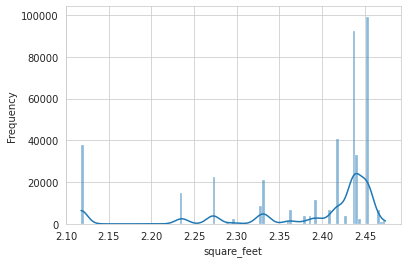

In [49]:
#After log_transformation
plot_histogram(test_merge, 'square_feet')

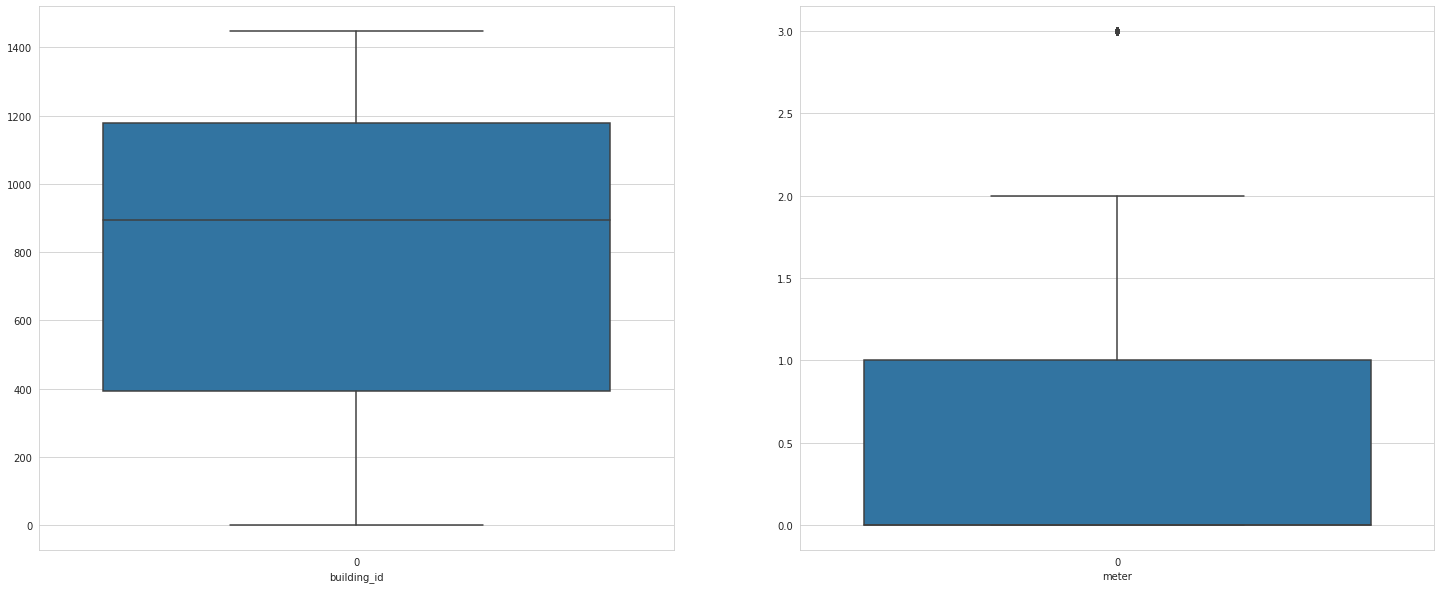

In [50]:
boxplot_func(train_df,['building_id', 'meter'])
plt.show()

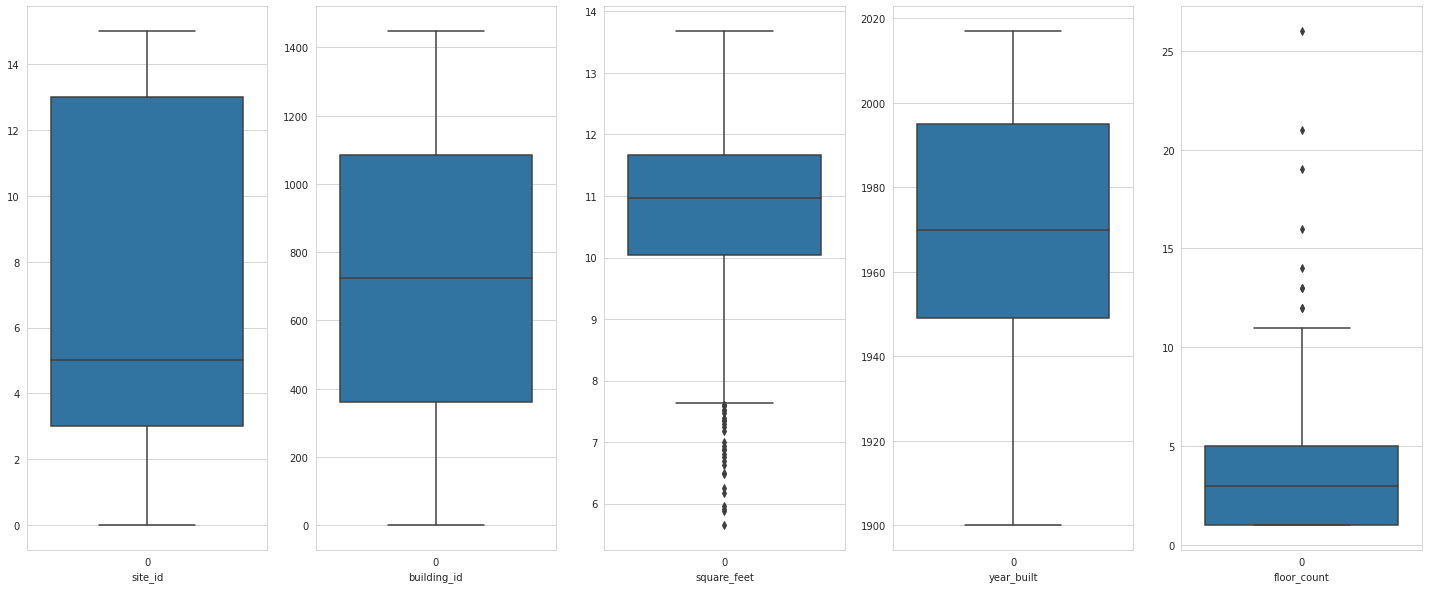

In [52]:
boxplot_func(building_meta_df,['site_id', 'building_id', 'square_feet', 'year_built',
       'floor_count'])
plt.show()

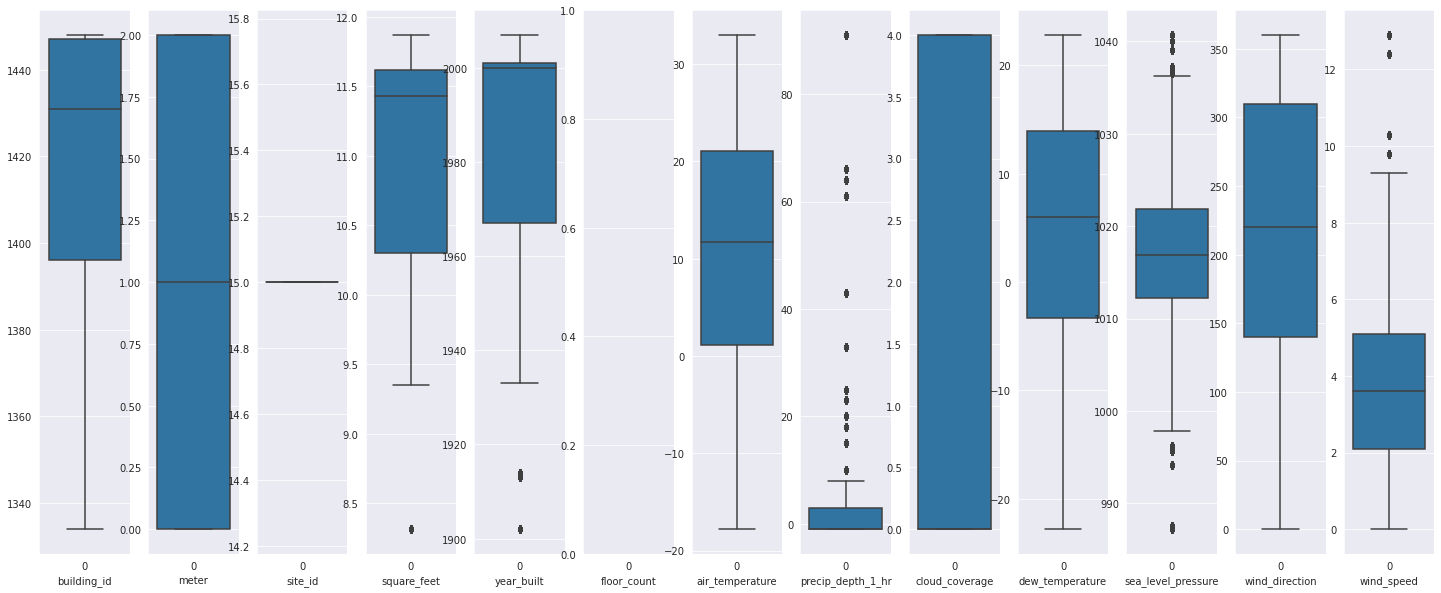

In [72]:
boxplot_func(test_merge,['building_id', 'meter', 'site_id',
       'square_feet', 'year_built', 'floor_count',
       'air_temperature','precip_depth_1_hr', 'cloud_coverage', 'dew_temperature',
       'sea_level_pressure', 'wind_direction',
       'wind_speed'])
plt.show()

In [54]:
print('---Summary after log transformation---')
building_meta_df["square_feet"].describe()

---Summary after log transformation---


count    1449.000000
mean       10.789761
std         1.274648
min         5.648974
25%        10.043815
50%        10.962562
75%        11.658557
max        13.681980
Name: square_feet, dtype: float64

In [55]:
print('---Summary after log transformation---')
test_merge["square_feet"].describe()

---Summary after log transformation---


count    421940.000000
mean         10.885138
std           1.019158
min           8.311890
25%          10.301458
50%          11.432496
75%          11.620532
max          11.869914
Name: square_feet, dtype: float64

**Boxplot without outliers**

In [57]:
def plot_boxplots(df):
    # Get list of numeric columns
    numeric_cols = list(df.select_dtypes(include='number').columns)
    # Calculate number of subplots
    num_plots = len(numeric_cols)
    num_rows = num_plots // 3 + 1 if num_plots % 3 != 0 else num_plots // 3
    # Create subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
    axes = axes.flatten()
    # Loop through numeric columns and plot boxplots
    for i, col in enumerate(numeric_cols):
        sns.boxplot(y=col, data=df, ax=axes[i], showfliers=False)
        axes[i].set_xlabel(col, fontsize=18)
    # Remove unused subplots
    for j in range(num_plots, num_rows*3):
        fig.delaxes(axes[j])
    fig.suptitle("Boxplots without outliers",fontsize=25)
    plt.show()

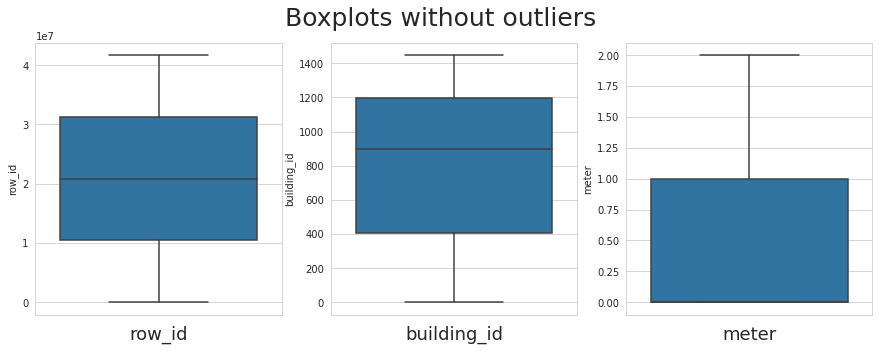

In [58]:
plot_boxplots(test_df)

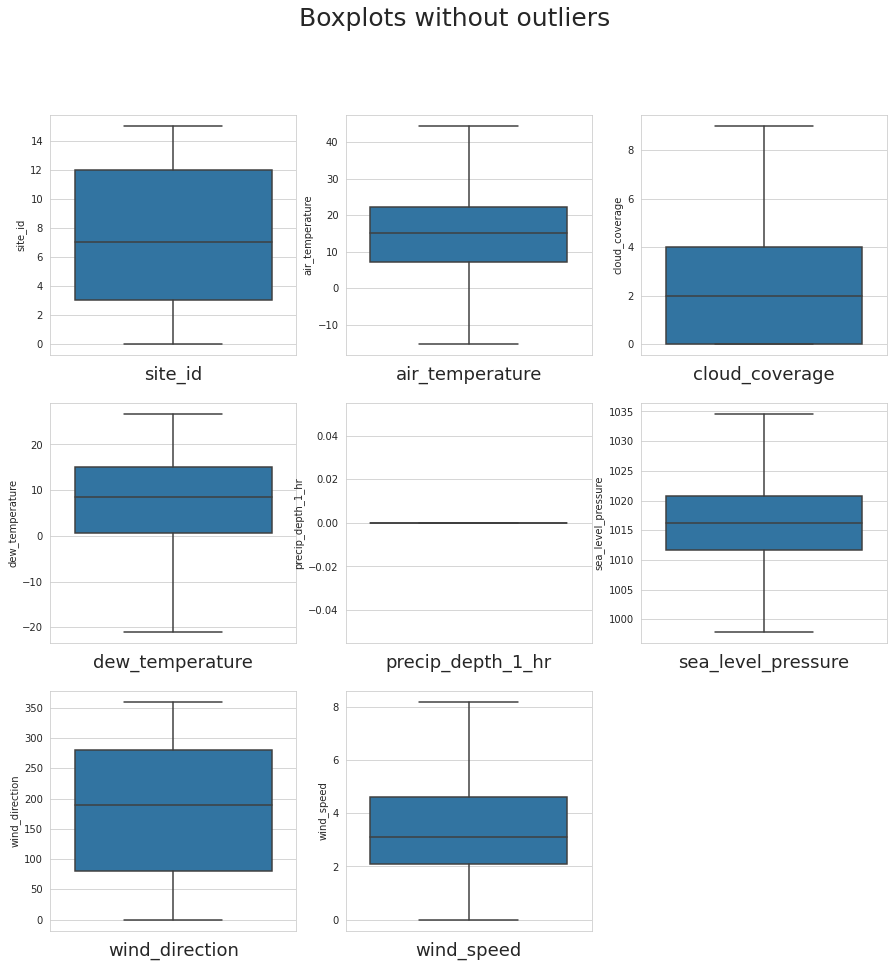

In [59]:
plot_boxplots(weather_test_df)

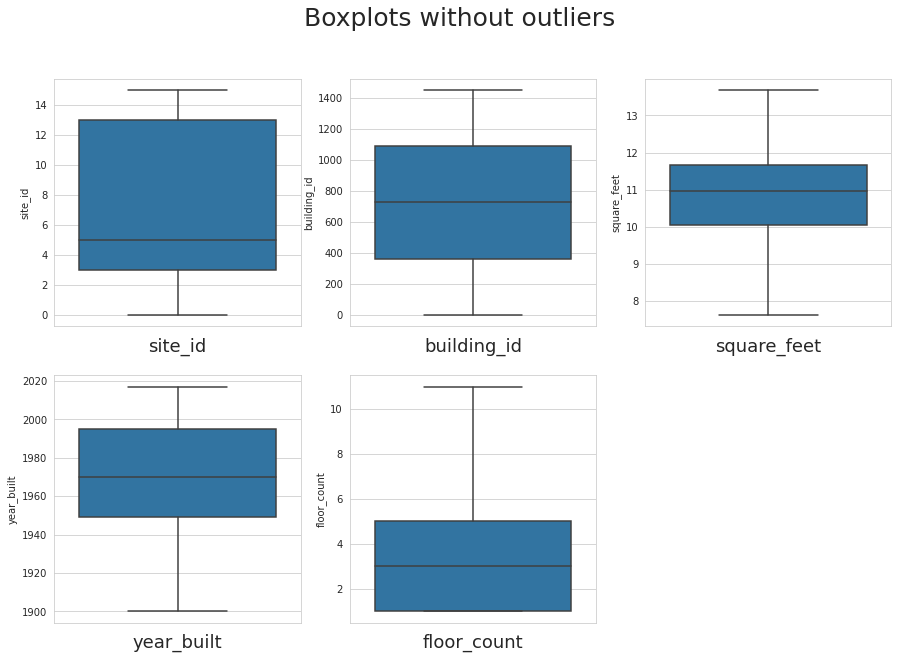

In [60]:
plot_boxplots(building_meta_df)

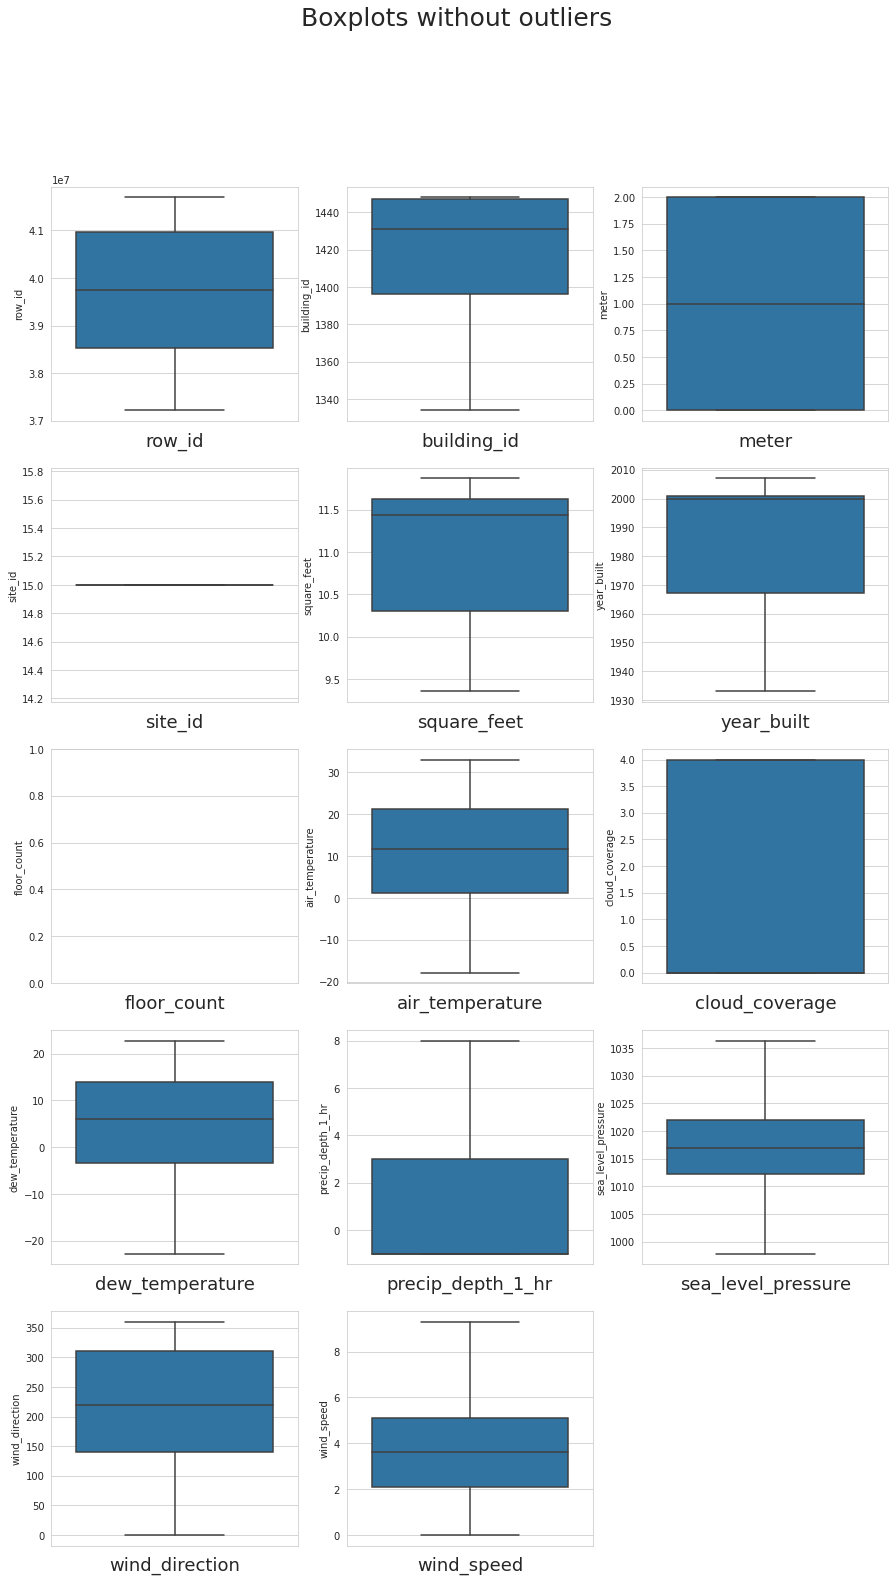

In [61]:
plot_boxplots(test_merge)

**Analysis of Test data**

Text(0.5, 1.0, 'Count values per meter ')

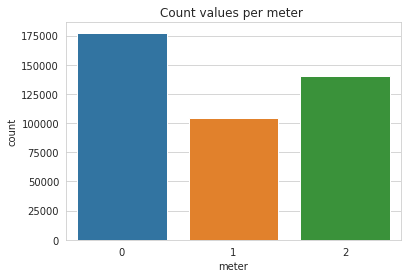

In [62]:
sns.countplot(x="meter", data=test_merge)
plt.title('Count values per meter ')

**Primary Use**

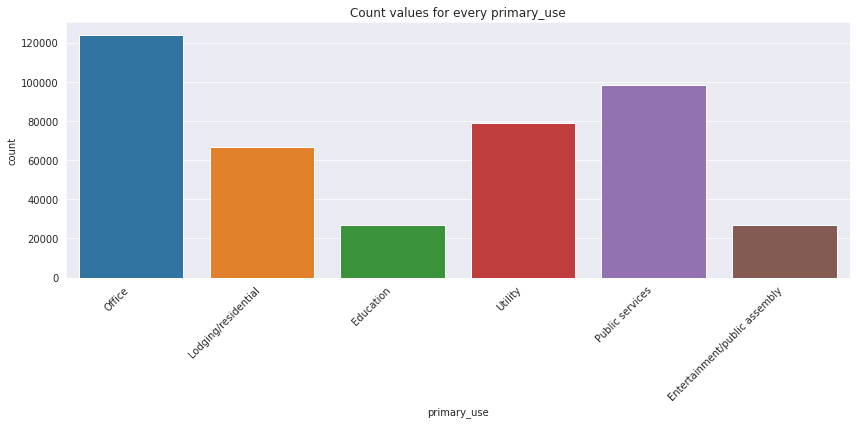

In [64]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="primary_use", data=test_merge)
plt.title('Count values for every primary_use')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Building ID**

<Axes: xlabel='building_id', ylabel='count'>

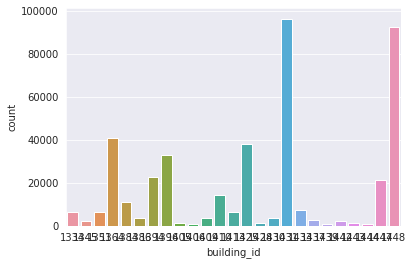

In [65]:
sns.countplot(x="building_id",data=test_merge)

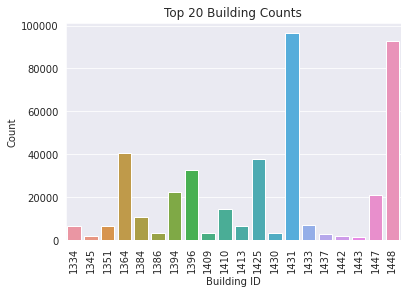

In [66]:
top_20_counts = test_merge['building_id'].value_counts().head(20)
sns.barplot(x=top_20_counts.index, y=top_20_counts.values)
plt.title('Top 20 Building Counts')
plt.xlabel('Building ID')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()

Text(0.5, 1.0, 'Count values per year')

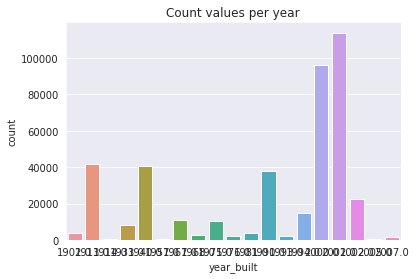

In [67]:
sns.countplot(x='year_built',data=test_merge)
plt.title('Count values per year')

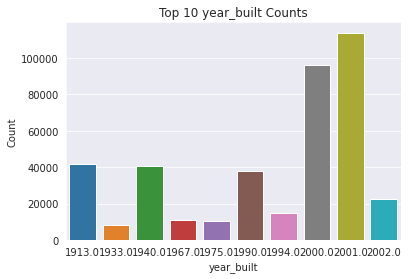

In [68]:
top_10_counts = test_merge['year_built'].value_counts().head(10)
sns.barplot(x=top_10_counts.index, y=top_10_counts.values)
plt.title('Top 10 year_built Counts')
plt.xlabel('year_built')
plt.ylabel('Count')
plt.show()

**Cloud Coverage**

Text(0.5, 1.0, 'Count values every cloud_coverage ')

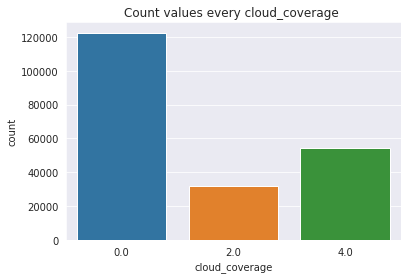

In [69]:
sns.countplot(x="cloud_coverage", data=test_merge)
plt.title('Count values every cloud_coverage ')

**Wind direction**

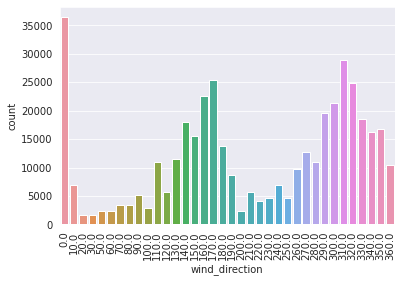

In [71]:
sns.countplot(x='wind_direction',data=test_merge)
plt.xticks(rotation=90)
plt.show()